# Mie Performance and Jitting

**Scott Prahl**

**April 2021**

*If miepython is not installed, uncomment the following cell (i.e., delete the #) and run (shift-enter)*

In [1]:
#!pip install --user miepython

In [2]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import miepython.miepython as miepython
    import miepython.miepython_nojit as miepython_nojit

except ModuleNotFoundError:
    print('miepython not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

## Size Parameters

We will use `%timeit` to see speeds for unjitted code, then jitted code

89.8 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
716 µs ± 45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.59 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.2 ms ± 364 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
59.1 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
243 ms ± 7.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
21.8 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
16.1 µs ± 180 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
55.8 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
209 µs ± 2.51 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
787 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.05 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


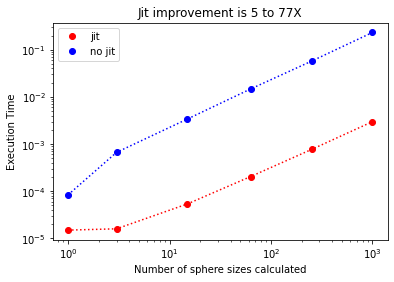

In [3]:
ntests=6

m=1.5
N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    x = np.linspace(0.1,20,N[i]) 
    a = %timeit -o qext, qsca, qback, g = miepython.mie(m,x)
    result[i]=a.best

for i in range(ntests):
    x = np.linspace(0.1,20,N[i]) 
    a = %timeit -o qext, qsca, qback, g = miepython_nojit..mie(m,x)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of sphere sizes calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Embedded spheres

282 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
648 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.14 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.2 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
57.6 ms ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
208 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.3 µs ± 554 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
16.3 µs ± 282 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
53.9 µs ± 2.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
205 µs ± 21.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
838 µs ± 86.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.99 ms ± 289 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


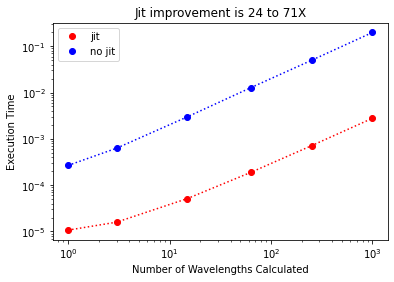

In [4]:
ntests = 6
mwater = 4/3   # rough approximation
m=1.0
mm = m/mwater
r=500                            # nm

N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    xx = 2*np.pi*r*mwater/lambda0
    a = %timeit -o qext, qsca, qback, g = miepython_nojit.mie(mm,xx)
    result[i]=a.best

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    xx = 2*np.pi*r*mwater/lambda0
    a = %timeit -o qext, qsca, qback, g = miepython.mie(mm,xx)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Wavelengths Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Testing `ez_mie`

Another high level function that should be sped up by jitting.

294 µs ± 36.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
689 µs ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.24 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.2 ms ± 458 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
53.4 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
217 ms ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.6 µs ± 927 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
21.8 µs ± 2.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
55.8 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
206 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
756 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.16 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


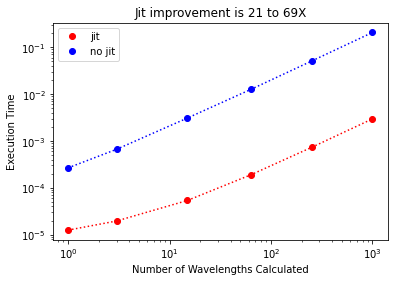

In [5]:
ntests=6
m_sphere = 1.0
n_water  = 4/3
d = 1000                        # nm
N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    a = %timeit -o qext, qsca, qback, g = miepython_nojit.ez_mie(m_sphere, d, lambda0, n_water)
    result[i]=a.best

for i in range(ntests):
    lambda0 = np.linspace(300,800,N[i])  # also in nm
    a = %timeit -o qext, qsca, qback, g = miepython.ez_mie(m_sphere, d, lambda0, n_water)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Wavelengths Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## Scattering Phase Function

128 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
261 µs ± 18.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.12 ms ± 96.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.47 ms ± 439 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
17.7 ms ± 711 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
70.2 ms ± 5.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.47 µs ± 230 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.52 µs ± 27.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.66 µs ± 31.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.3 µs ± 272 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
26 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
96.4 µs ± 2.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


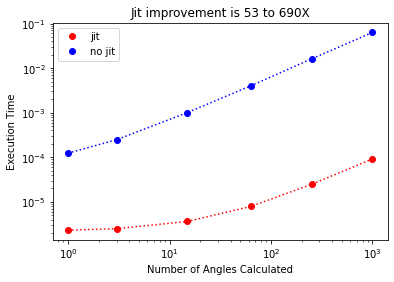

In [6]:
ntests = 6
m = 1.5
x = np.pi/3

N = np.logspace(0,3,ntests,dtype=int)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

for i in range(ntests):
    theta = np.linspace(-180,180,N[i])
    mu = np.cos(theta/180*np.pi)
    a = %timeit -o s1, s2 = miepython_nojit.mie_S1_S2(m,x,mu)
    result[i]=a.best

for i in range(ntests):
    theta = np.linspace(-180,180,N[i])
    mu = np.cos(theta/180*np.pi)
    a = %timeit -o s1, s2 = miepython.mie_S1_S2(m,x,mu)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Number of Angles Calculated")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()

## And finally, as function of sphere size

3.26 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.91 ms ± 198 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.1 ms ± 432 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
43.7 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
156 ms ± 2.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
597 ms ± 31.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.56 µs ± 631 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
11.3 µs ± 636 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
23.6 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
66.1 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
222 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
818 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


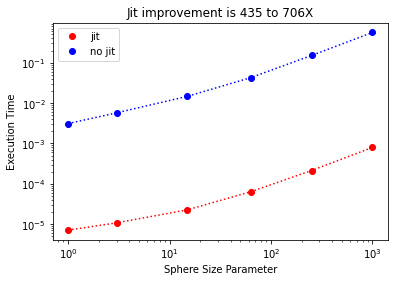

In [8]:
ntests=6
m = 1.5-0.1j
x = np.logspace(0,3,ntests)
result = np.zeros(ntests)
resultj = np.zeros(ntests)

theta = np.linspace(-180,180)
mu = np.cos(theta/180*np.pi)

for i in range(ntests):
    a = %timeit -o s1, s2 = miepython_nojit.mie_S1_S2(m,x[i],mu)
    result[i]=a.best

for i in range(ntests):
    a = %timeit -o s1, s2 = miepython.mie_S1_S2(m,x[i],mu)
    resultj[i]=a.best

improvement = result/resultj
plt.loglog(N,resultj,':r')
plt.loglog(N,result,':b')
plt.loglog(N,resultj,'or',label='jit')
plt.loglog(N,result,'ob', label='no jit')
plt.legend()
plt.xlabel("Sphere Size Parameter")
plt.ylabel("Execution Time")
plt.title("Jit improvement is %d to %dX"%(np.min(improvement),np.max(improvement)))
plt.show()